In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [2]:
df_sra = pd.read_csv('../data_tables/sra_technology_species.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_sra

,LibraryStrategy,SRAStudy,ScientificName
0,WGS,ERP000767,Leishmania infantum
1,WGS,ERP000767,Leishmania infantum
2,WGS,ERP000767,Leishmania donovani
3,WGS,ERP000767,Leishmania donovani
4,WGS,ERP000767,Leishmania donovani
...,...,...,...
7676058,FL-cDNA,SRP002493,Vaccinia virus
7676059,FL-cDNA,SRP002493,Vaccinia virus
7676060,FL-cDNA,SRP002493,Vaccinia virus
7676061,OTHER,SRP002064,environmental samples


In [3]:
df_sra.columns = ['Technology','SRAStudy','Species']
df_sra

,Technology,SRAStudy,Species
0,WGS,ERP000767,Leishmania infantum
1,WGS,ERP000767,Leishmania infantum
2,WGS,ERP000767,Leishmania donovani
3,WGS,ERP000767,Leishmania donovani
4,WGS,ERP000767,Leishmania donovani
...,...,...,...
7676058,FL-cDNA,SRP002493,Vaccinia virus
7676059,FL-cDNA,SRP002493,Vaccinia virus
7676060,FL-cDNA,SRP002493,Vaccinia virus
7676061,OTHER,SRP002064,environmental samples


In [4]:
df_sra = df_sra.drop_duplicates(subset=['SRAStudy'],keep='first')
df_sra

,Technology,SRAStudy,Species
0,WGS,ERP000767,Leishmania infantum
26,WGS,ERP021269,Salarias fasciatus
41,Targeted-Capture,ERP110990,Leishmania donovani
197,WGS,ERP108795,Homo sapiens
299,POOLCLONE,ERP108142,Homo sapiens
...,...,...,...
7676036,AMPLICON,SRP002405,viral metagenome
7676043,FL-cDNA,SRP002407,Drosophila simulans
7676046,OTHER,SRP001735,Human herpesvirus 4 strain B95-8
7676055,AMPLICON,SRP001705,Human immunodeficiency virus 1


In [5]:
df_sra_count = pd.read_csv('../data_tables/SRAStudy_count.csv', error_bad_lines=False, low_memory=False,quoting=3)

df_sra_count 

,Unnamed: 0,SRAStudy,Count
0,0,0,4
1,1,0.0,7
2,2,100,2
3,3,454,12
4,4,AB,2
...,...,...,...
20054,20054,SRP200173,6
20055,20055,SRP201254,1
20056,20056,SRP201956,1
20057,20057,SRP212328,1


In [6]:
df_sra_count = df_sra_count.drop(df_sra_count.columns[[0]], axis=1)
df_sra_count

,SRAStudy,Count
0,0,4
1,0.0,7
2,100,2
3,454,12
4,AB,2
...,...,...
20054,SRP200173,6
20055,SRP201254,1
20056,SRP201956,1
20057,SRP212328,1


In [7]:
#df_sra_count = df_sra_count[df_sra_count['Count'] > 1]#reuse counts
#df_sra_count

In [8]:
df_combined=pd.merge(df_sra, df_sra_count, on="SRAStudy")
df_combined

,Technology,SRAStudy,Species,Count
0,WGS,ERP000767,Leishmania infantum,3
1,WGS,ERP000195,Anopheles gambiae,2
2,WGS,ERP000190,Plasmodium falciparum,40
3,WGS,SRP046387,Escherichia coli,22
4,WGS,SRP063697,Salmonella enterica,1
...,...,...,...,...
20050,WGS,ERP001880,Foot-and-mouth disease virus - type O,1
20051,RNA-Seq,SRP013296,Flock House virus,1
20052,AMPLICON,ERP001147,Human immunodeficiency virus 1,1
20053,AMPLICON,SRP014319,HIV-1 M:B_89.6,1


In [9]:
df_combined = df_combined.drop(df_combined.columns[[0,1]], axis=1)
df_combined

,Species,Count
0,Leishmania infantum,3
1,Anopheles gambiae,2
2,Plasmodium falciparum,40
3,Escherichia coli,22
4,Salmonella enterica,1
...,...,...
20050,Foot-and-mouth disease virus - type O,1
20051,Flock House virus,1
20052,Human immunodeficiency virus 1,1
20053,HIV-1 M:B_89.6,1


In [10]:
df_sra_species=df_combined.groupby('Species').agg({'Count':'sum'}).reset_index().rename(columns={'Species':"Count"})
df_sra_species

,Count,Count
0,''Brassica napus'' phytoplasma,1
1,''Sphingomonas ginsengisoli'' Hoang et al. 2012,1
2,Abelmoschus esculentus,3
3,Abeoforma whisleri,2
4,Abies koreana,6
...,...,...
5743,wastewater metagenome,77
5744,wetland metagenome,6
5745,wine metagenome,3
5746,wood decay metagenome,4


In [11]:
df_sra_species.columns = ['Species','Count']
df_sra_species

,Species,Count
0,''Brassica napus'' phytoplasma,1
1,''Sphingomonas ginsengisoli'' Hoang et al. 2012,1
2,Abelmoschus esculentus,3
3,Abeoforma whisleri,2
4,Abies koreana,6
...,...,...
5743,wastewater metagenome,77
5744,wetland metagenome,6
5745,wine metagenome,3
5746,wood decay metagenome,4


In [12]:
Total = df_sra_species['Count'].sum()
print (Total)

63297


In [13]:
df_sra_species['Percentage']=(df_sra_species['Count']/63297)*100
df_sra_species

,Species,Count,Percentage
0,''Brassica napus'' phytoplasma,1,0.001580
1,''Sphingomonas ginsengisoli'' Hoang et al. 2012,1,0.001580
2,Abelmoschus esculentus,3,0.004740
3,Abeoforma whisleri,2,0.003160
4,Abies koreana,6,0.009479
...,...,...,...
5743,wastewater metagenome,77,0.121649
5744,wetland metagenome,6,0.009479
5745,wine metagenome,3,0.004740
5746,wood decay metagenome,4,0.006319


In [14]:
df_sra_species = df_sra_species[df_sra_species['Percentage'] > 5]#remove percentage that less than 5
df_sra_species

,Species,Count,Percentage
2401,Homo sapiens,6370,10.063668
5692,soil metagenome,4455,7.038248


<Figure size 2880x1800 with 0 Axes>

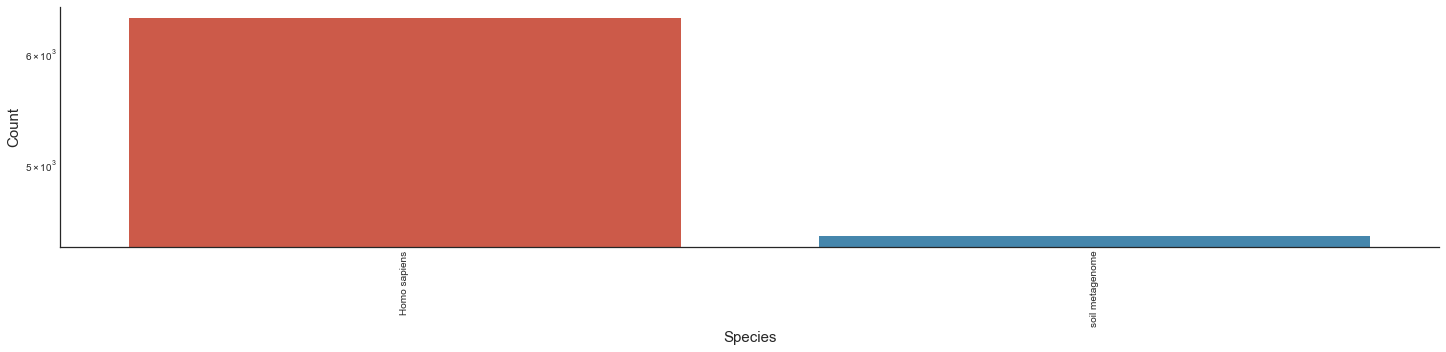

In [15]:
# set aesthetics
plt.style.use(['ggplot', 'seaborn-white'])
plt.figure(figsize=(40,25))

# generate axes
ax = sns.catplot(x='Species', y='Count', data=df_sra_species,
            height=4,aspect=5,kind='bar')
sns.despine()
#plt.ylim(0, 50)

# set axis labels
ax.axes[0,0].set_xlabel('Species', fontsize = 15)
ax.axes[0,0].set_ylabel('Count', fontsize = 15)
plt.xticks(rotation=90)
plt.yscale('log')

#save to .png
ax.savefig('reuse_by_species_SRA.png', dpi = 200, bbox_inches = 'tight', transparent = False)